In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [9]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size = (256,256),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [10]:
classes = data.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(data)

68

In [12]:
for image_batch, label_batch in data.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
   

(32, 256, 256, 3)
[0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1]


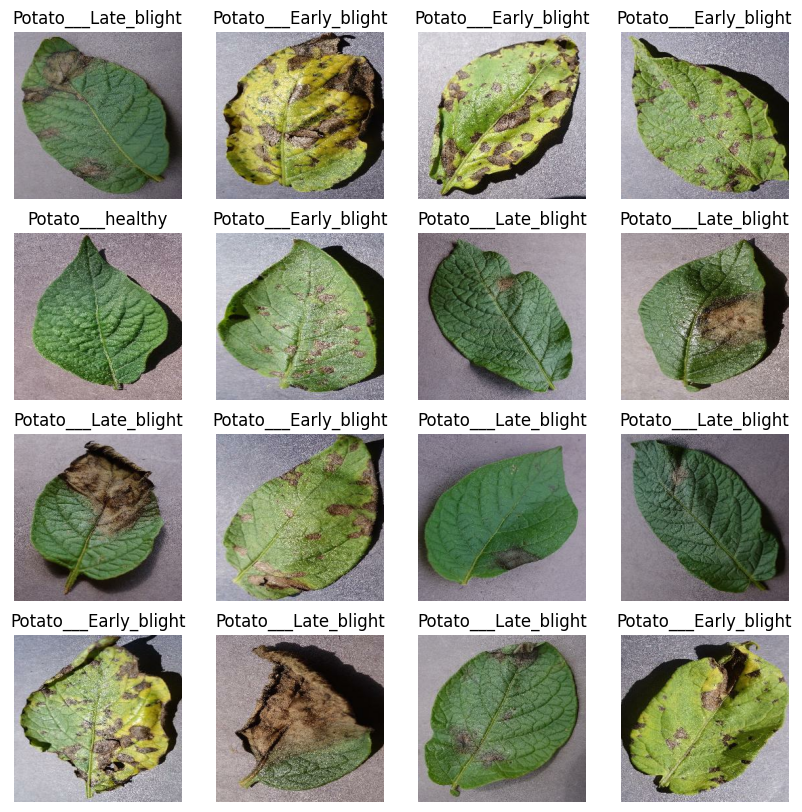

In [21]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in data.take(1):
    for i in range (16):
        show = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes[label_batch[i]])
        plt.axis("off")

In [71]:
train_size = 0.8
val_size = 0.10
test_sie = 0.10

In [72]:
len(data)*train_size

54.400000000000006

In [73]:
len(data)*val_size

6.800000000000001

In [77]:
train_set= data.take(54)
print(len(train_set))

remain_set= data.skip(54)
val_set= remain_set.take(6)
print(len(val_set))

test_set= remain_set.skip(6)
print(len(test_set))

54
6
8


In [78]:
train_set= train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_set= val_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set= test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [79]:
preprocessing = tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
])

In [80]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [81]:
model = models.Sequential([
    preprocessing,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (32, 256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(3, activation='softmax')
])

model.build(input_shape= (32, 256, 256, 3))
    

In [82]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,875 (655.76 KB)

 Trainable params: 167,875 (655.76 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [84]:
history= model.fit(train_set, epochs=20, batch_size=32, verbose=1, validation_data= val_set)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 800ms/step - accuracy: 0.5004 - loss: 0.9193 - val_accuracy: 0.6406 - val_loss: 0.8029
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7122 - loss: 0.6630 - val_accuracy: 0.8490 - val_loss: 0.3463
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 911ms/step - accuracy: 0.8570 - loss: 0.3668 - val_accuracy: 0.9062 - val_loss: 0.3589
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 948ms/step - accuracy: 0.8334 - loss: 0.3914 - val_accuracy: 0.9271 - val_loss: 0.1753
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 985ms/step - accuracy: 0.9389 - loss: 0.1778 - val_accuracy: 0.9740 - val_loss: 0.1202
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9396 - loss: 0.1555 - val_accuracy: 0.9167 - val_loss: 0.2405
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 953ms/step - accuracy: 0.9381 - loss: 0.1513 - val_accuracy: 0.9896 - val_loss: 0.0543
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 948ms/step - accuracy: 0.9568 - loss: 0.1380 - val_accuracy: 

In [85]:
scores = model.evaluate(test_set)
print(scores)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9985 - loss: 0.0200
[0.03154469653964043, 0.9956896305084229]


In [86]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [87]:
accuracy= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

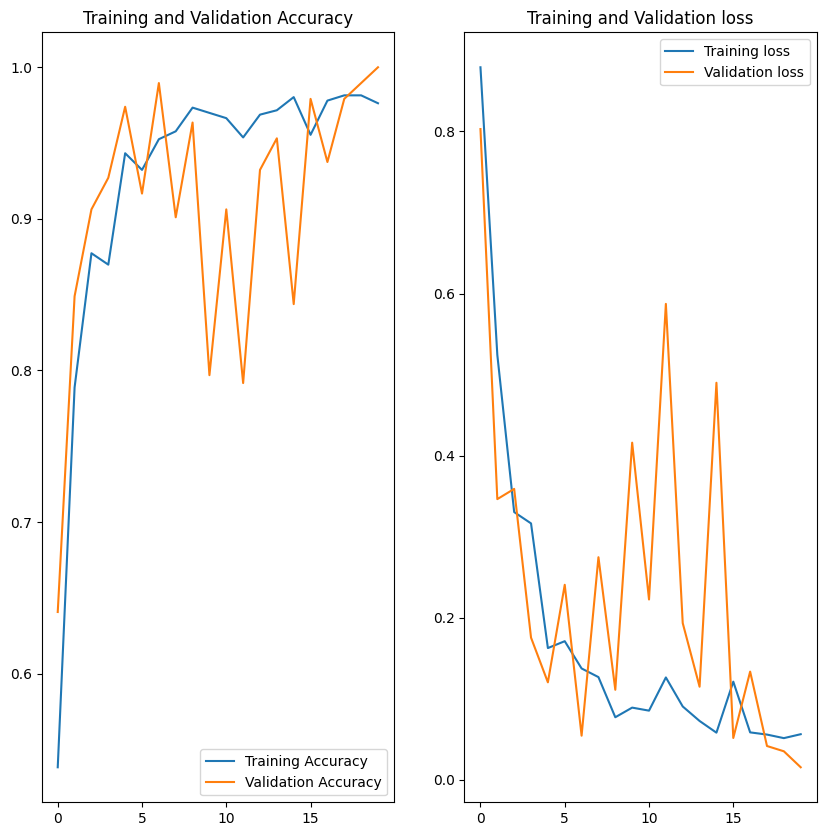

In [88]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(range(20), accuracy, label= 'Training Accuracy')
plt.plot(range(20), val_acc, label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label= 'Training loss')
plt.plot(range(20), val_loss, label= 'Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

plt.show()

first image to predict
first image actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
first image predict label: Potato___Early_blight


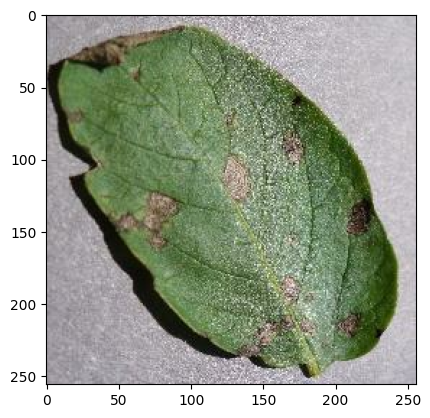

In [89]:
import numpy as np
for image_batch, labels_batch in test_set.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label:", classes[first_label])

    batch_pred = model.predict(image_batch)
    print("first image predict label:", classes[np.argmax(batch_pred[0])])
      

In [90]:
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


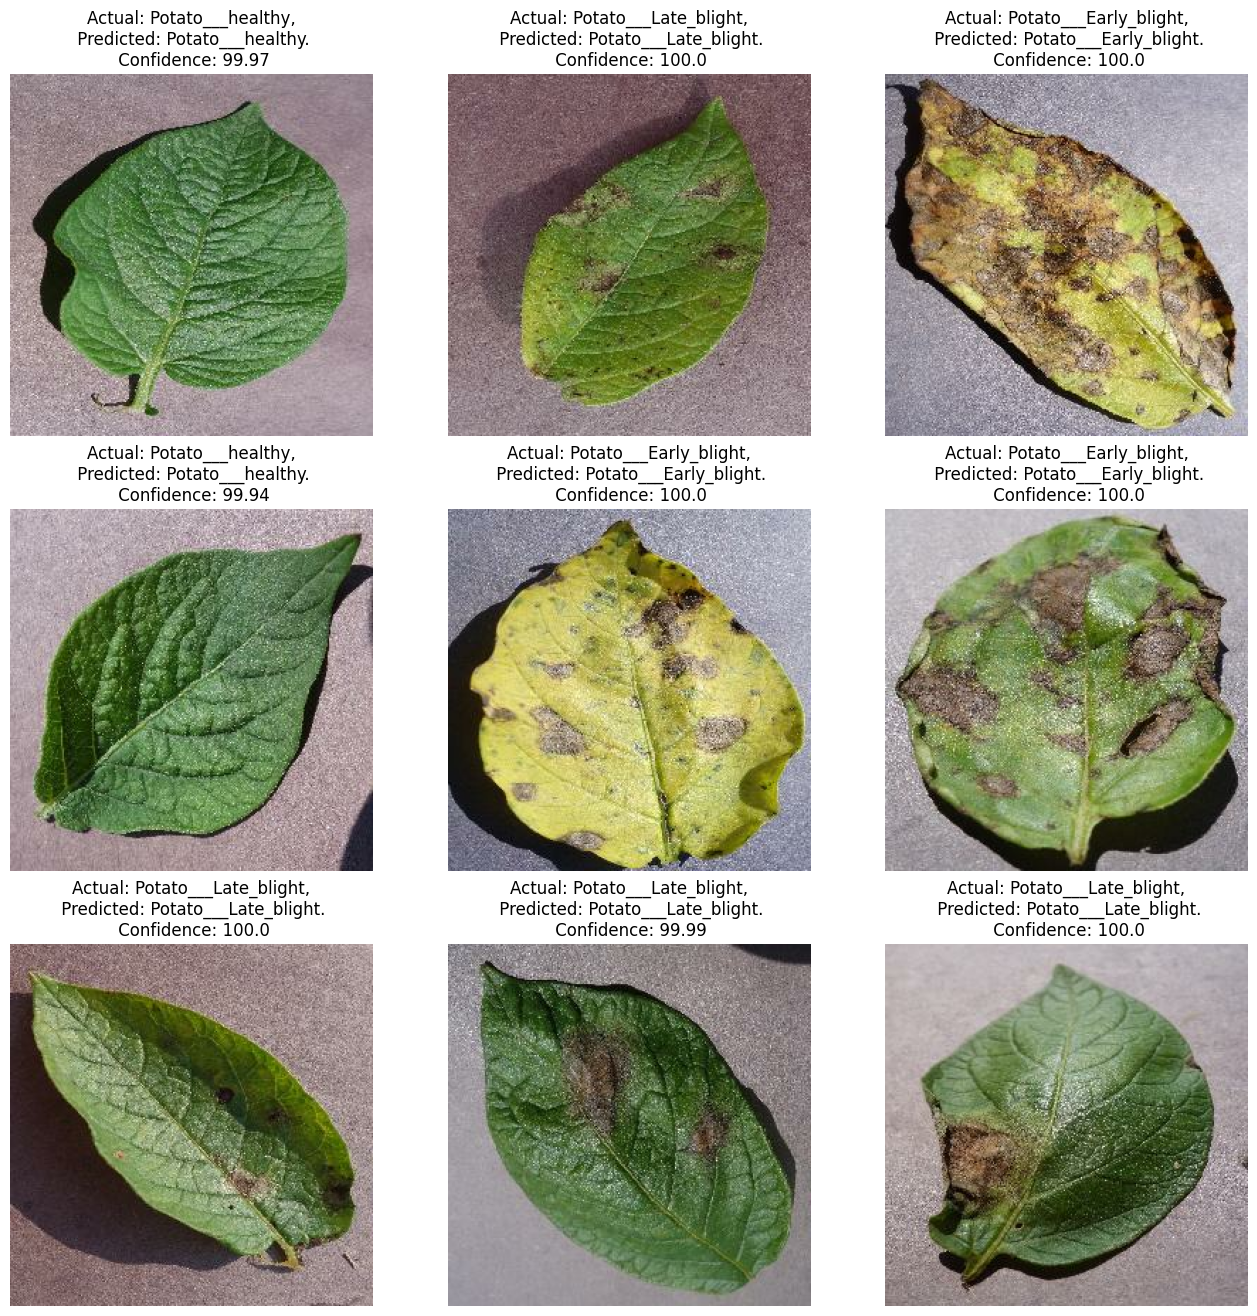

In [91]:
plt.figure(figsize=(16,16))
for images, labels in test_set.take(1):
    for i in range(9):
        show = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = pred(model, images[i].numpy())
        actual_class = classes[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}")
        plt.axis("off")



In [98]:
import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))